#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [182]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/home/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [183]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')



   1 - Basic Data Exploration: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.


In [184]:
# Number of rows, columns
n_rows, n_columns = df.shape
print(f"This dataSet has {n_rows} rows and has {n_columns} columns")

# data type of each column
print(f"This dataset has datatypes \n\n{df.dtypes}")

# Number of mising values NA in each columns
print(f"This number of missing values for each column \n\n{df.isnull().sum()}")


This dataSet has 148654 rows and has 13 columns
This dataset has datatypes 

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object
This number of missing values for each column 

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


1 Descriptive Statistics: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

In [185]:
# to describe the while dataset
# print("Dataset Descriptive Statistics \n", df.describe())


# Statistics mean
salary_mean = df["TotalPayBenefits"].mean()
salary_median = df["TotalPayBenefits"].median()
salary_mode = df["TotalPayBenefits"].mode()
salary_min = df["TotalPayBenefits"].min()
salary_max = df["TotalPayBenefits"].max()
salary_range = salary_max - salary_min
salary_standard_deviation = df["TotalPayBenefits"].std()


print("Salary mean is %d," % (salary_mean))
print("Salary median is %d," % (salary_median))
print("Salary mode is %d," % (salary_mode))
print("Salary min is %d," % (salary_min))
print("Salary max is %d," % (salary_max))
print("Salary range is %d," % (salary_range))
print("Salary standard deviation is %d," % (salary_standard_deviation))


Salary mean is 93692,
Salary median is 92404,
Salary mode is 7959,
Salary min is -618,
Salary max is 567595,
Salary range is 568213,
Salary standard deviation is 62793,


3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

> Indented block



In [186]:
# from sklearn.impute import KNNImputer

# # we will remove the rows that have 0 net salary "TotalPayBenift", as negitave value have a meaning, of the this emplyee, is have to pay to the company

# df = df[df["TotalPayBenefits"] > 0]
# df.head()

# print(df.isna().sum())

# # then we imputate the na with knn

# imputer = KNNImputer(n_neighbors=4)
# num_colums = df.select_dtypes(include = ["float64"]).drop(["Notes", "Status"], axis = 1).columns
# df_num = df[num_colums]

# df_numeric_imputed = pd.DataFrame(imputer.fit_transform(df_num), columns=df_num.columns)

# df[num_colums] = df_numeric_imputed
# df.head()

In [187]:
# I think imputation with knn is not suitable, as importing employee not related to their salar, but their joining turn
from sklearn.impute import SimpleImputer

# we will remove the rows that have 0 net salary "TotalPayBenift", as negitave value have a meaning, of the this emplyee, is have to pay to the company

df = df[df["TotalPayBenefits"] > 0]

# then we imputate the na with mean

num_colums = df.select_dtypes(include = ["float64"]).drop(["Notes", "Status"], axis = 1).columns
df_num = df[num_colums]
df_num.fillna(df_num.mean(), inplace=True)

df[num_colums] = df_num
# df.head()

print(df.isna().sum())


Id                       0
EmployeeName             0
JobTitle                 0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits                 0
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148620
Agency                   0
Status              148620
dtype: int64


<ipython-input-187-2974d1bb4d94>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.fillna(df_num.mean(), inplace=True)
<ipython-input-187-2974d1bb4d94>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.fillna(df_num.mean(), inplace=True)
<ipython-input-187-2974d1bb4d94>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

4 - **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

Text(0, 0.5, 'Frequency')

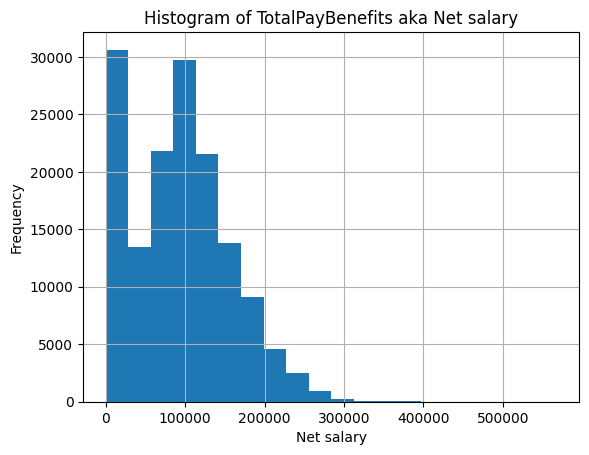

In [188]:
# histogram
import matplotlib.pyplot as plt

df["TotalPayBenefits"].hist(bins = 20)

# Set the title and axis labels
plt.title('Histogram of TotalPayBenefits aka Net salary')
plt.xlabel('Net salary')
plt.ylabel('Frequency')


Civil & criminal Department    1534
Police department               712
Seasonal                        116
Mfcc                             90
Fire department                  78
Sfers                            64
Name: 0, dtype: int64
Other Department: 146026


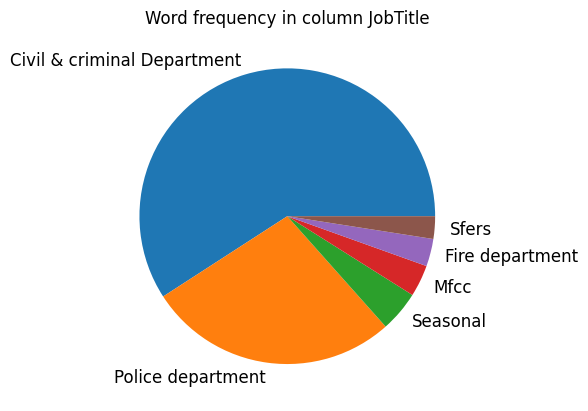

In [260]:
departments = df['JobTitle'].str.extractall(r'\((.*?)\)')[0]

departments = departments.apply(lambda x: 'Fire Department' if x.lower()
 in ['fire department', 'fire dept'] else x.lower().capitalize())

departments = departments.apply(lambda x: 'Civil & criminal Department' if x.lower()
in ['civil & criminal', 'civil/criminal', "cvl&crmnl"] else x.lower().capitalize())

# print(departments.unique())

dep_frequency = departments.value_counts()

other_departments = df.shape[0] - dep_frequency.sum().sum()

print(dep_frequency)
print("Other Department:", other_departments)

# Draw pie chart
plt.pie(dep_frequency, labels=dep_frequency.index, textprops={'fontsize': 12})
plt.title(f'Word frequency in column JobTitle')
plt.show()

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

In [253]:
# Group by year, and get its statistical summary
print("Group by year, and get its statistical summary")
print(df.groupby("Year")["TotalPayBenefits"].describe())

print("\n", "Group by year, and get its statistical mean", "\n")
print(df.groupby("Year")["TotalPayBenefits"].mean())

# Another way is to use Pivot table

# pd.pivot_table(df, values = "TotalPayBenefits", index = "Year", aggfunc="describe")
# To get mean
pd.pivot_table(df, values = "TotalPayBenefits", index = "Year", aggfunc="mean")


Group by year, and get its statistical summary
        count           mean           std   min         25%         50%  \
Year                                                                       
2011  36156.0   71750.056751  47496.180914  0.30  36831.4500   68217.525   
2012  36766.0  100553.229232  63555.796681  1.91  51743.0925  101751.290   
2013  37603.0  101448.613919  66386.497614  5.56  48324.1400  101978.360   
2014  38095.0  100324.619996  66207.361714  7.24  44405.6100  101155.390   

              75%        max  
Year                          
2011  102517.1975  567595.43  
2012  142396.3325  407274.78  
2013  142798.3500  425815.28  
2014  142771.1800  510732.68  

 Group by year, and get its statistical mean 

Year
2011     71750.056751
2012    100553.229232
2013    101448.613919
2014    100324.619996
Name: TotalPayBenefits, dtype: float64


,TotalPayBenefits
Year,
2011,71750.056751
2012,100553.229232
2013,101448.613919
2014,100324.619996


6 - **Simple Correlation Analysis:** Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

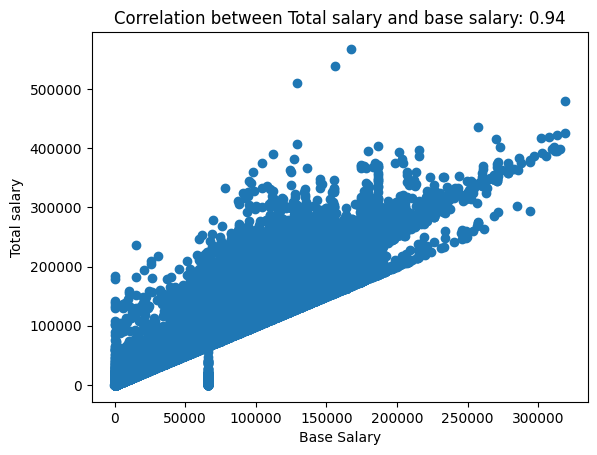

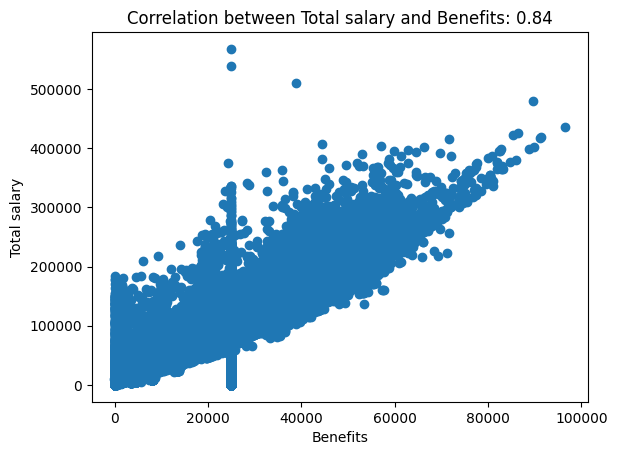

In [258]:
# Correlation between Total salary and base salary

correlation = df["TotalPayBenefits"].corr(df['BasePay'])

plt.scatter(x=df['BasePay'], y = df["TotalPayBenefits"])
plt.xlabel("Base Salary")
plt.ylabel("Total salary")
plt.title(f'Correlation between Total salary and base salary: {correlation:.2f}')
plt.show()


# Correlation between Total salary and Benefits

correlation = df["TotalPayBenefits"].corr(df["Benefits"])

plt.scatter(x=df['Benefits'], y = df["TotalPayBenefits"])
plt.xlabel("Benefits")
plt.ylabel("Total salary")
plt.title(f'Correlation between Total salary and Benefits: {correlation:.2f}')
plt.show()

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

1.   While cleaning data, I removed some observation, some noise data, which there is not usefull information regarding salary, other set to its mean as imputation

2.   The total salary is skewed to the right, as there
are out-laier in salaries, affecting the mean to be more that the median value

3.   There are corelation between Benefits and BaseSalary
4.   The average salary in 2013 in the maximun average salary in the all years listed in Dataset


**Thank** **you**